In [1]:
import pandas as pd
import warnings

import scanpy as sc
from pathlib import Path
import anndata
from sklearn.metrics import adjusted_rand_score as ari_score, accuracy_score
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import anndata
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score
import pandas as pd

def getACC(label_key, prediction_key):
    NMI = normalized_mutual_info_score(label_key, prediction_key)
    HOM = homogeneity_score(label_key, prediction_key)
    COM = completeness_score(label_key, prediction_key)
    return (NMI + HOM + COM)/3


/home/jinjie/miniconda3/envs/SpaCMGAE/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jinjie/miniconda3/envs/SpaCMGAE/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/jinjie/miniconda3/envs/SpaCMGAE/lib/python3.10/site-packages/anndata/__init__.py:52: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/home/jinjie/miniconda3/envs/SpaCMGAE/lib/python3.10/site-packages/scanpy/plotting/_utils.py:488: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/jinjie/miniconda3/envs/SpaCMGAE/lib/py

mid_ari:0.5985426505841137	mid_nmi:0.710685683995197


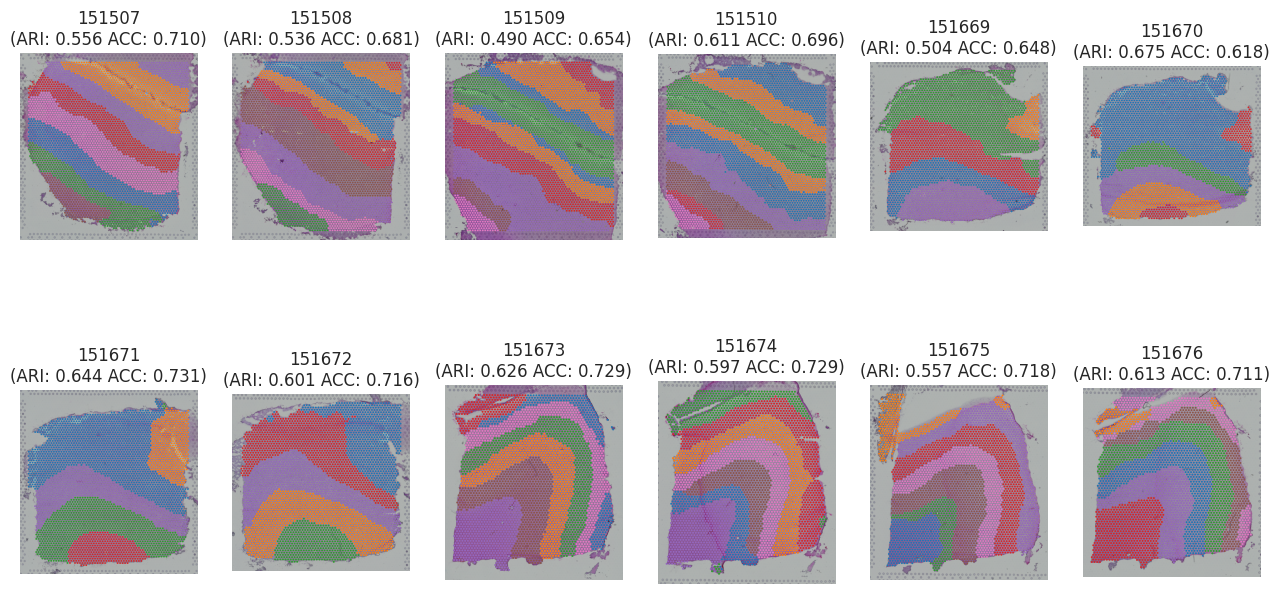

In [6]:
import matplotlib.pyplot as plt


def draw_cluster_spatial(adata, ax, name, title, ARI, ACC, legend_loc='lower right'):
    sc.pl.spatial(adata, color=[name], show=False, ax=ax, legend_loc=legend_loc)
    ax.axis('off')
    ax.set_title('%s\n(ARI: %.3f ACC: %.3f)' % (title, ARI, ACC))


fig, axs = plt.subplots(2, 6, figsize=(16, 8))
ari_list = []
nmi_list = []

section_id = ["151507", "151508", "151509", "151510", "151669", "151670", "151671", "151672",
              "151673", "151674", "151675", "151676"]
for id, tissue_name in enumerate(section_id):
    n_clusters = 5 if tissue_name in ['151669', '151670', '151671', '151672'] else 7
    data_root = Path('/home/jinjie/JinJie/SpaMGCL/result') / f"SpaMGCL{tissue_name}_results.h5ad"
    adata = anndata.read(data_root)
    adata = adata[~pd.isnull(adata.obs['layer_guess'])]
    ARI = adjusted_rand_score(adata.obs['layer_guess'], adata.obs['domain'])
    ACC = getACC(adata.obs['layer_guess'], adata.obs['domain'])
    ari_list.append(ARI)
    nmi_list.append(ACC)
    draw_cluster_spatial(adata, ax=axs[id // 6,id % 6], name='domain', title=tissue_name, ARI=ARI, ACC=ACC, legend_loc=None)
mid_ari = np.median(ari_list)
mid_nmi = np.median(nmi_list)
print(f"mid_ari:{mid_ari}\tmid_nmi:{mid_nmi}")

In [7]:
adata

AnnData object with n_obs × n_vars = 3431 × 2000
    obs: 'in_tissue', 'array_row', 'array_col', 'layer_guess', 'mclust', 'domain'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'n_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'spatial', 'domain_colors'
    obsm: 'X_pca', 'latent', 'spatial'
    layers: 'count'

In [25]:
maps = {'2':'Layer_1', '7':'Layer_2', '3':'Layer_3', '6':'Layer_4', '4':'Layer_5', '5':'Layer_6','1':'WM'}
maps = {'5':'Layer_1', '1':'Layer_2', '7':'Layer_3', '3':'Layer_4', '2':'Layer_5', '6':'Layer_6','4':'WM'}



In [22]:
values = [maps[value] for value in adata.obs['domain']]
import pandas as pd
data = {'cluster': values}
df = pd.DataFrame(data, index=adata.obs['domain'].index)

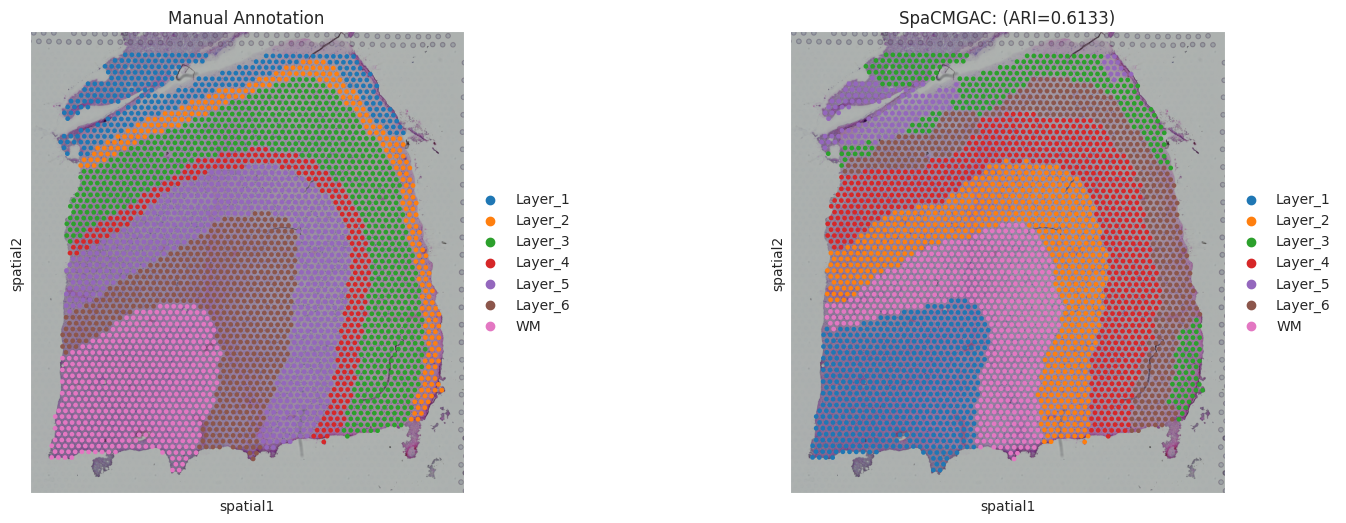

In [23]:
import matplotlib.pyplot as plt
import scanpy as sc

adata.obs['my_clust'] = df
adata.obs['True'] = adata.obs['layer_guess']

# 调整图像宽度，使其左右更宽
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 增大宽度为 12，而高度保持 6

# 绘制第一个空间图
sc.pl.spatial(adata, color='True', ax=axes[0], show=False)
axes[0].set_title('Manual Annotation')

# 绘制第二个空间图
sc.pl.spatial(adata, color='my_clust', ax=axes[1], show=False)
axes[1].set_title(f'SpaCMGAC: (ARI={ARI:.4f})')

# 显示图像
plt.show()


[<Axes: xlabel='UMAP1', ylabel='UMAP2'>, <Axes: >]

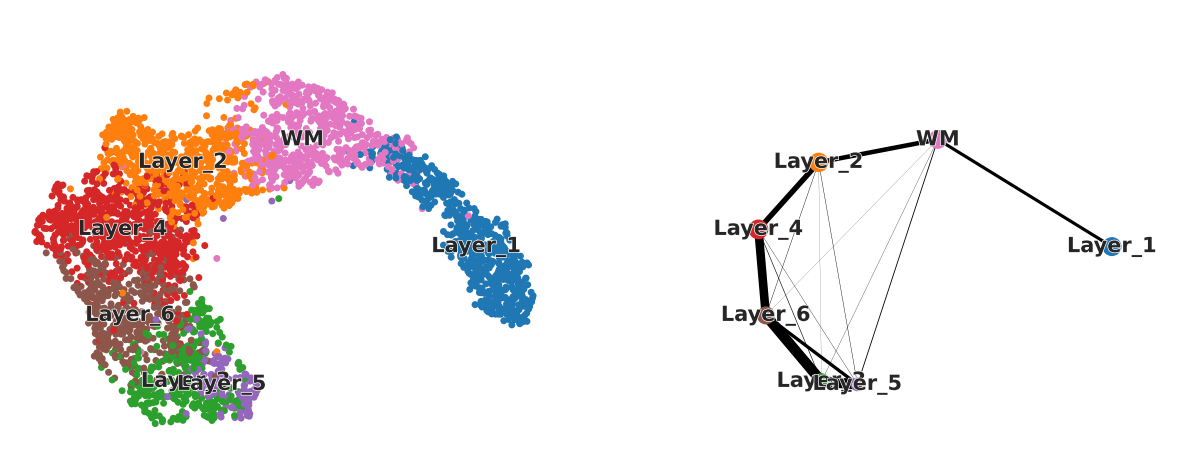

In [26]:
sc.pp.neighbors(adata, n_neighbors=12, n_pcs=20, use_rep='latent')
sc.tl.umap(adata)
sc.tl.paga(adata, groups='my_clust')
sc.pl.paga_compare(adata, legend_fontsize=15, frameon=False, size=100, title=' ', legend_fontoutline=1, show=False)
